In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)




In [2]:
#Reading our train data
train_data = pd.read_csv("train_ctrUa4K (1).csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Reading our test data
test_data = pd.read_csv
test_data = pd.read_csv("test_lAUu6dG (1).csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
#cheking the rows and columns of the train data set
train_data.shape

(614, 13)

The train data comprise of 614 rows and 13 columns 

In [6]:
# checking the tet data frame rows and columns
test_data.shape

(367, 12)

our test data has 367 rows and 12 columns

In [8]:
# checking the train data frame information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


the test data frame has 8 objects,1 integer and four objects 

In [10]:
#statistical findings
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The descriptive statistics show that the dataset contains 614 records, with missing values in **LoanAmount**, **Loan_Amount_Term**, and **Credit_History**. Applicant and coapplicant incomes exhibit high variability and right-skewness, indicating the presence of outliers. Most loan amounts are concentrated around the median, while the loan repayment term is predominantly 360 months. Credit history is largely positive, suggesting that most applicants have a good credit record.


In [12]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


The summary statistics indicate that this subset contains 367 records, with missing values observed in **LoanAmount**, **Loan_Amount_Term**, and **Credit_History**. Applicant and coapplicant incomes show substantial variability and right-skewness, with several high-income outliers. Loan amounts are moderately dispersed around the median, while the loan term is predominantly 360 months. Most applicants have a positive credit history, suggesting generally good creditworthiness within the dataset.


# Data Preprocessing

We're going to look into :
1. missing values
2. Duplicated values
3. Data types
4. outliers 


In [16]:
# checking for missing values
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Our train data has some missing values in various columns. Gender has 13, Married has 3,Dependants has 15,Self employed has 32,loanamount 22,loan_amount_term 14 and credit history 50

In [18]:
#checking the percentage of missing values 
# Percentage of missing values
missing_percent = train_data.isnull().sum() / len(train_data) * 100
missing_percent


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

The dataset contains a few missing values, with the highest being in **Credit_History** at 8.14%, followed by **Self_Employed** (5.21%) and **LoanAmount** (3.58%). Other columns such as **Dependents**, **Gender**, **Loan_Amount_Term**, and **Married** have less than 3% missing data each. Since the proportion of missing values is relatively low, they can be handled through imputation. Categorical columns can be filled with their most frequent value (mode), while numerical columns like **LoanAmount** can be filled with the median. Addressing these missing values ensures the dataset is complete and ready for further analysis or modeling.


In [20]:
# List of categorical columns to fill (including Dependents)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Fill missing values in numerical columns
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

# Verify that all missing values are handled
train_data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [22]:
#checking the percentage of missing values 
# Percentage of missing values
missing_percent = test_data.isnull().sum() / len(test_data) * 100
missing_percent


Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [23]:
#Filling in of missing values 
# List of categorical columns to fill (including Dependents)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Fill missing values in numerical columns
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
# Save the cleaned test dataset
test_data.to_csv("test_cleaned.csv", index=False)
# Verify that all missing values are handled
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [24]:
#Finding if we have any duplicated values
train_data.duplicated().sum()

np.int64(0)

our dataframe has no missing values 

In [26]:
# Check data types for train and test datasets

# Check data types for train and test datasets
print("Train Data Types:")
print(train_data.dtypes)

print("\nTest Data Types:")
print(test_data.dtypes)


Train Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Test Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [27]:
# Fixing data types
train_data['Dependents'].replace('3+', 3, inplace=True)
train_data['Dependents'] = train_data['Dependents'].astype(int)

test_data['Dependents'].replace('3+', 3, inplace=True)
test_data['Dependents'] = test_data['Dependents'].astype(int)


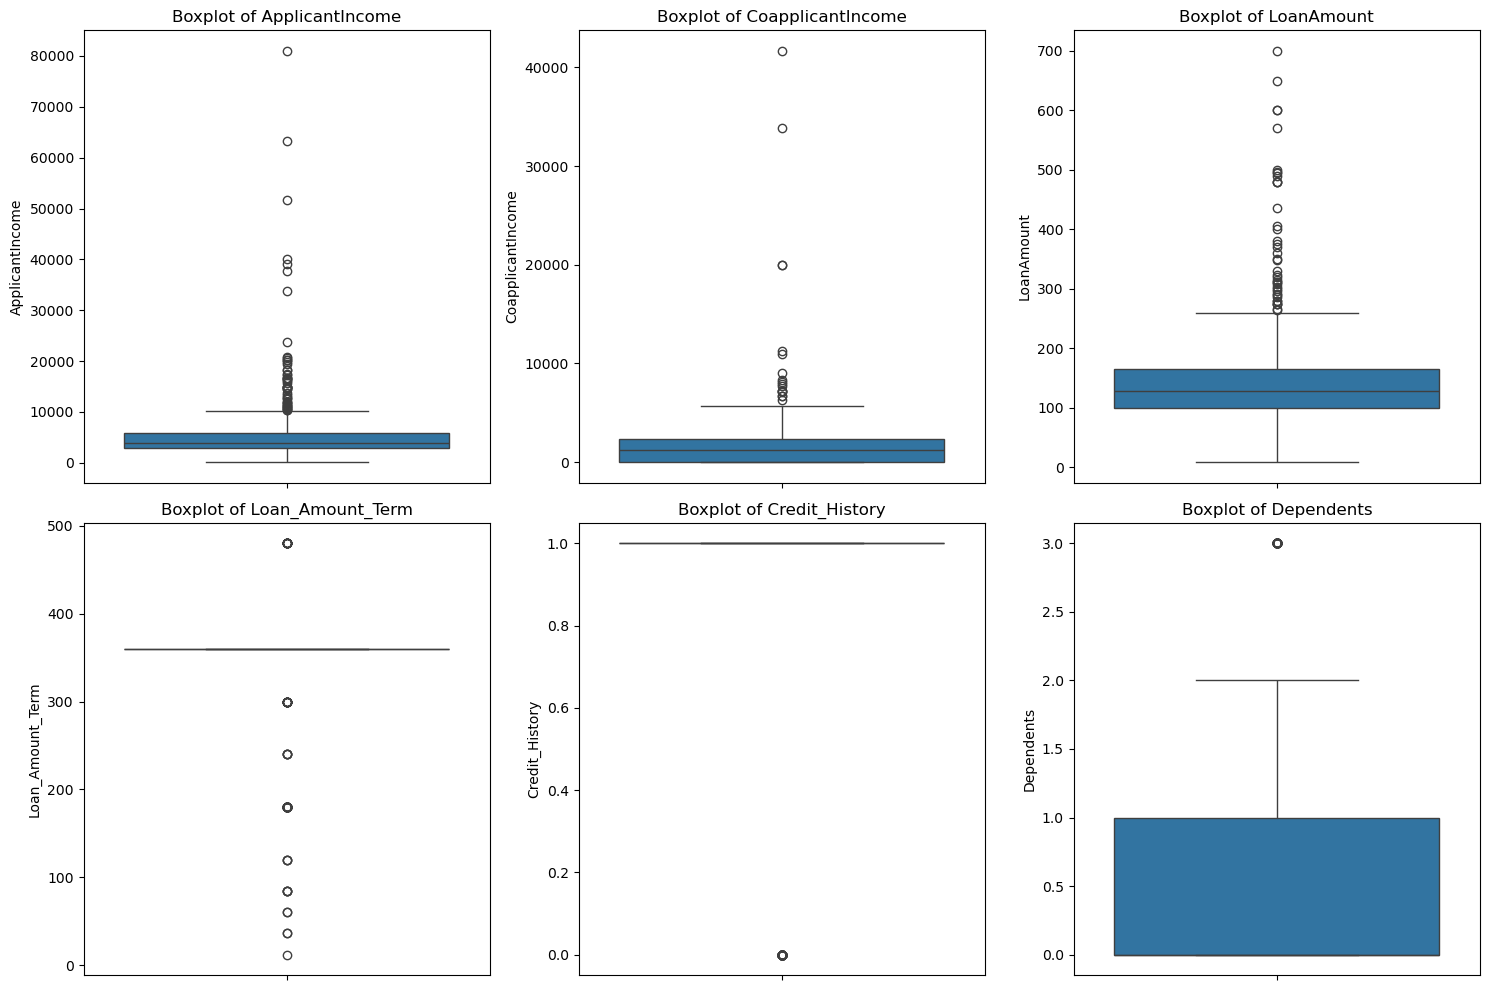

In [28]:
#Checking for outliers
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=train_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


The numerical features in the dataset, including ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term, contain several extreme values, as revealed by boxplot analysis. These outliers, particularly high incomes and large loan amounts, could potentially skew model predictions if left unaddressed. To mitigate this, outliers can either be capped using interquartile ranges (IQR) or transformed using logarithmic scaling, which reduces their impact while preserving the overall data distribution. Handling these extreme values ensures that the machine learning model can learn patterns more effectively and produce more reliable predictions for loan eligibility.

# Exploratory Data Analysis
# Univariate Analysis

# How is the dataset split between male and female applicants?

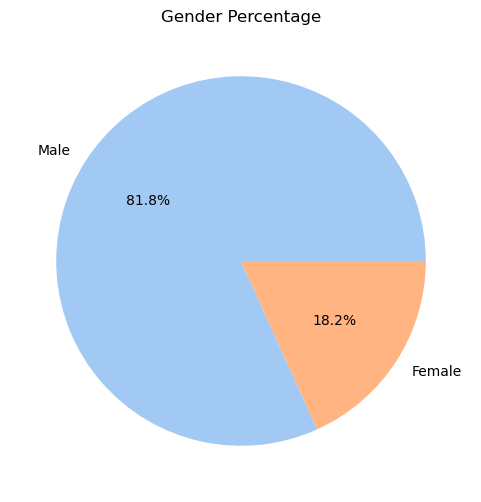

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = train_data['Gender'].value_counts()
percent = train_data['Gender'].value_counts(normalize=True)*100


# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Gender Percentage")
plt.show()


most of the applicants are male ith 82% compared to 18.2% of females 

# What proportion of applicants are married vs unmarried?

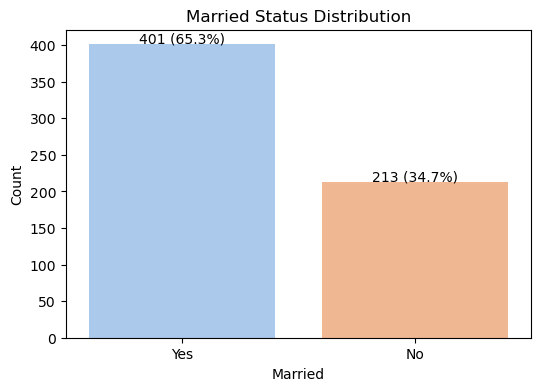

In [35]:
counts = train_data['Married'].value_counts()
percent = train_data['Married'].value_counts(normalize=True)*100

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette="pastel")
for i, v in enumerate(counts.values):
    plt.text(i, v + 2, f"{v} ({percent[i]:.1f}%)", ha='center')
plt.title("Married Status Distribution")
plt.ylabel("Count")
plt.show()



most of the applicants are the married once with a higher percentage of 65.3%

# How many dependents do applicants have, and which group is most common?

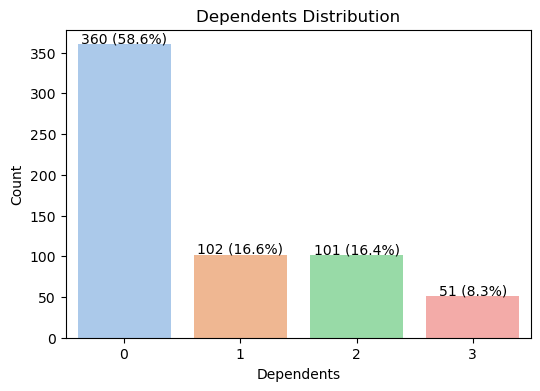

In [38]:
counts = train_data['Dependents'].value_counts()
percent = train_data['Dependents'].value_counts(normalize=True)*100

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette="pastel")
for i, v in enumerate(counts.values):
    plt.text(i, v + 2, f"{v} ({percent[i]:.1f}%)", ha='center')
plt.title("Dependents Distribution")
plt.ylabel("Count")
plt.show()




In the dataset, the majority of applicants have no dependents, accounting for 58.6% of the total. Applicants with one dependent make up 16.6%, while those with two dependents are nearly the same at 16.4%. A smaller proportion of applicants, 8.3%, have three or more dependents. This distribution indicates that most loan applicants in the dataset are either single or have no financial dependents, with only a small fraction supporting larger families.

# How are applicants distributed between graduates and non-graduates

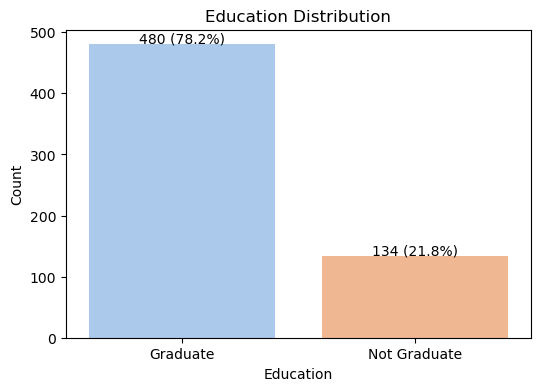

In [41]:
col = 'Education'
counts = train_data[col].value_counts()
percent = train_data[col].value_counts(normalize=True)*100

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette="pastel")
for i, v in enumerate(counts.values):
    plt.text(i, v + 2, f"{v} ({percent[i]:.1f}%)", ha='center')
plt.title(f"{col} Distribution")
plt.ylabel("Count")
plt.show()



# What proportion of applicants are self-employed?

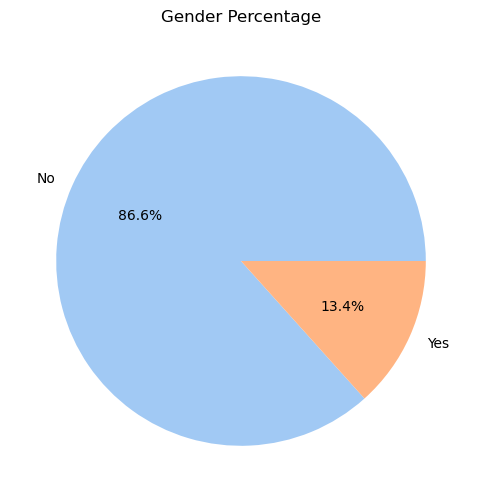

In [43]:
col = 'Self_Employed'
counts = train_data[col].value_counts()
percent = train_data[col].value_counts(normalize=True)*100
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Gender Percentage")
plt.show()


In the dataset, the majority of applicants are not self-employed, representing 80.6% of the total, while only a small portion of applicants are self-employed. This indicates that most applicants rely on salaried or regular employment sources rather than running their own business.

# What is the distribution of applicant income, and are there extreme values?

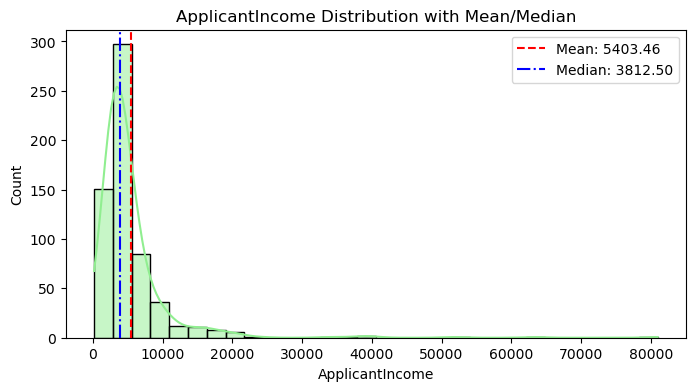

In [46]:
col = 'ApplicantIncome'

plt.figure(figsize=(8,4))
sns.histplot(train_data[col], kde=True, bins=30, color="lightgreen")
plt.axvline(train_data[col].mean(), color='red', linestyle='--', label=f"Mean: {train_data[col].mean():.2f}")
plt.axvline(train_data[col].median(), color='blue', linestyle='-.', label=f"Median: {train_data[col].median():.2f}")
plt.title(f"{col} Distribution with Mean/Median")
plt.legend()
plt.show()



The applicant income distribution is highly right-skewed, with most applicants earning between 0 and 10,000. The mean (5,403) is noticeably higher than the median (3,812), indicating the presence of high-income outliers that stretch the distribution up to around 80,000–90,000. These extreme values could influence loan prediction models and may require preprocessing, such as capping or transformation.

# What is the distribution of loan amounts and are there extreme values?

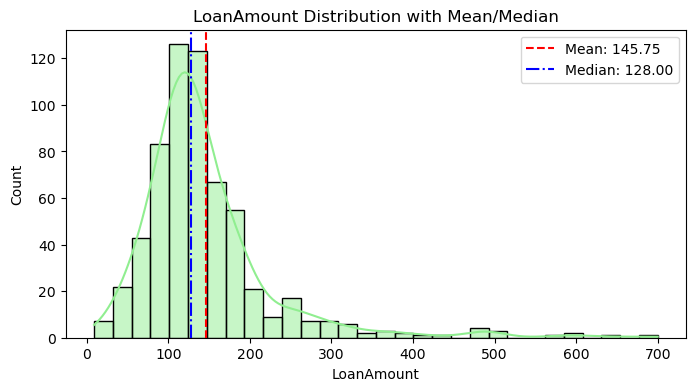

In [49]:
col = 'LoanAmount'

plt.figure(figsize=(8,4))
sns.histplot(train_data[col], kde=True, bins=30, color="lightgreen")
plt.axvline(train_data[col].mean(), color='red', linestyle='--', label=f"Mean: {train_data[col].mean():.2f}")
plt.axvline(train_data[col].median(), color='blue', linestyle='-.', label=f"Median: {train_data[col].median():.2f}")
plt.title(f"{col} Distribution with Mean/Median")
plt.legend()
plt.show()



The loan amount distribution is right-skewed, with most loans concentrated between 100–200, peaking around 120–150. The mean (145.75) is slightly higher than the median (128), indicating some higher-value loans stretching the distribution. A few upper outliers exist in the 500–700 range, but overall, the distribution is relatively controlled and more standardized compared to applicant income

# What loan terms are most common and how are they distributed?

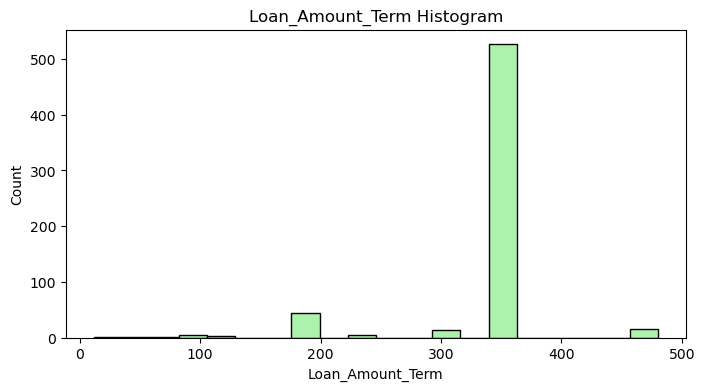

In [52]:
col = 'Loan_Amount_Term'
counts = train_data[col].value_counts()
percent = train_data[col].value_counts(normalize=True) * 100

plt.figure(figsize=(8,4))
sns.histplot(train_data[col], bins=20, kde=False, color="lightgreen")
plt.title(f"{col} Histogram")
plt.show()



The loan term distribution is highly concentrated around 360 months, indicating that most applicants opt for a 30-year loan term. Other loan terms (like 120, 180, 240, 300, and 480 months) appear much less frequently, with very few applicants choosing these durations. This shows that lenders and borrowers strongly prefer the standard long-term option, while shorter or unusual terms are rare.

# Bivariate Analysis

# Does Gender affect Loan_Status?

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


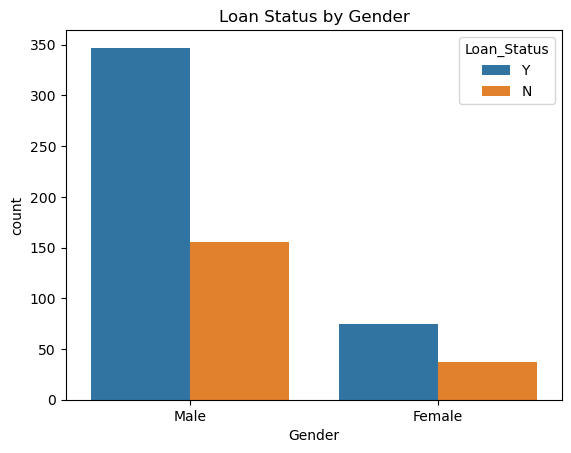

In [56]:
print(pd.crosstab(train_data['Gender'], train_data['Loan_Status']))

# Count plot
sns.countplot(data=train_data, x='Gender', hue='Loan_Status')
plt.title("Loan Status by Gender")
plt.show()

The analysis shows that gender does not significantly affect loan approval. Although there are more male applicants than female applicants, both genders have similar approval rates (about 69% for males and 67% for females). This suggests that loan approval decisions are largely gender-neutral, and gender alone is not a key factor in determining loan status.

# Does Marital status affect Loan_Status?

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


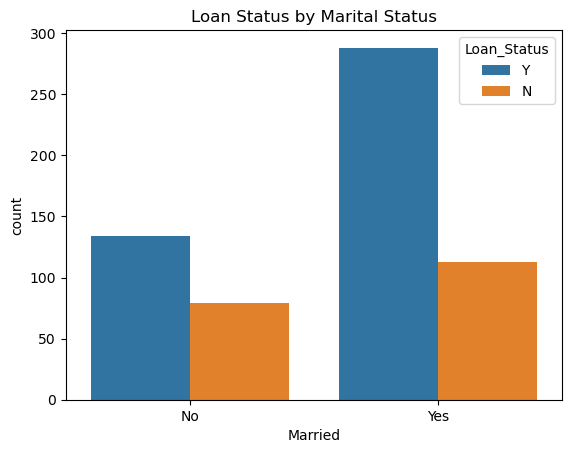

In [59]:
print(pd.crosstab(train_data['Married'], train_data['Loan_Status']))
sns.countplot(data=train_data, x='Married', hue='Loan_Status')
plt.title("Loan Status by Marital Status")
plt.show()


Marital status appears to influence loan approval. Married applicants have a higher approval rate (about 72%) compared to unmarried applicants (about 63%). While both groups receive more approvals than rejections, married applicants are approved at a noticeably higher rate, suggesting that marital status may be associated with increased loan approval likelihood in this dataset.

# Does Education affect Loan_Status?

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


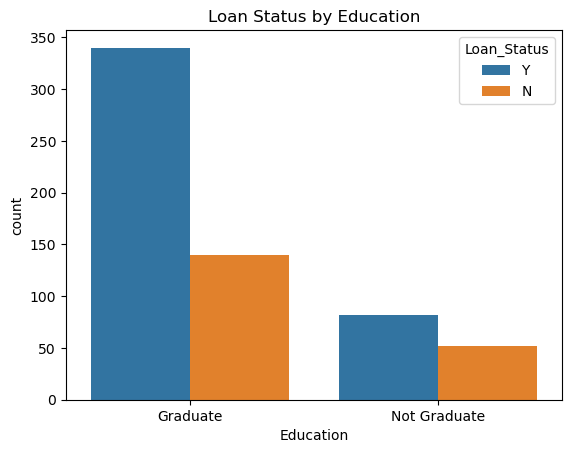

In [62]:
print(pd.crosstab(train_data['Education'], train_data['Loan_Status']))
sns.countplot(data=train_data, x='Education', hue='Loan_Status')
plt.title("Loan Status by Education")
plt.show()


Education level appears to influence loan approval. Graduate applicants have a higher approval rate (about 71%) compared to non-graduates (about 61%). Although both groups receive more approvals than rejections, graduates are approved at a noticeably higher rate, suggesting that higher education may be associated with better loan approval outcomes in this dataset.

# Does Self_Employment affect Loan_Status?

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


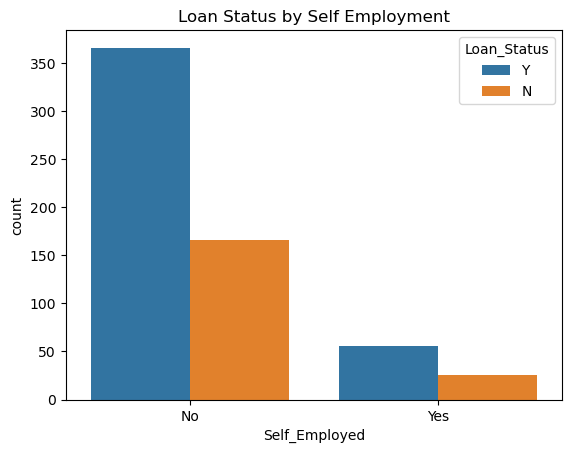

In [65]:
print(pd.crosstab(train_data['Self_Employed'], train_data['Loan_Status']))
sns.countplot(data=train_data, x='Self_Employed', hue='Loan_Status')
plt.title("Loan Status by Self Employment")
plt.show()


Self-employment does not appear to significantly affect loan approval. Both self-employed and non-self-employed applicants have nearly identical approval rates (about 68–69%). Although non-self-employed applicants make up the majority of loan applications, the similar approval rates suggest that self-employment status alone is not a major factor in determining loan status in this dataset.

# Does Property_Area affect Loan_Status?

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


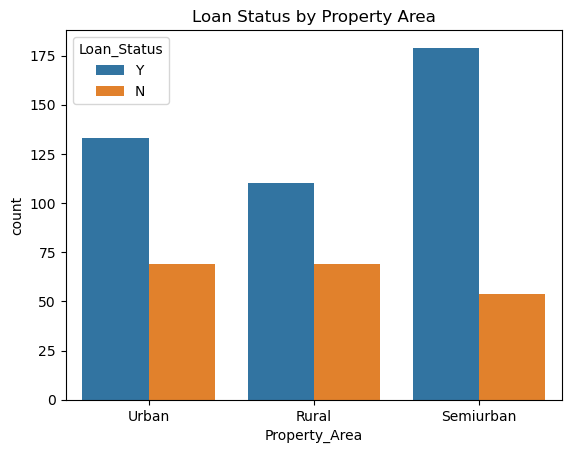

In [68]:
print(pd.crosstab(train_data['Property_Area'], train_data['Loan_Status']))
sns.countplot(data=train_data, x='Property_Area', hue='Loan_Status')
plt.title("Loan Status by Property Area")
plt.show()


Property area has an influence on loan approval. Semiurban applicants have the highest approval rate (about 77%), followed by urban areas (about 66%), while rural areas have the lowest approval rate (about 62%). This suggests that loans for semi-urban properties are more likely to be approved compared to urban and rural properties in this dataset.

# Does Credit_History affect Loan_Status?

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415


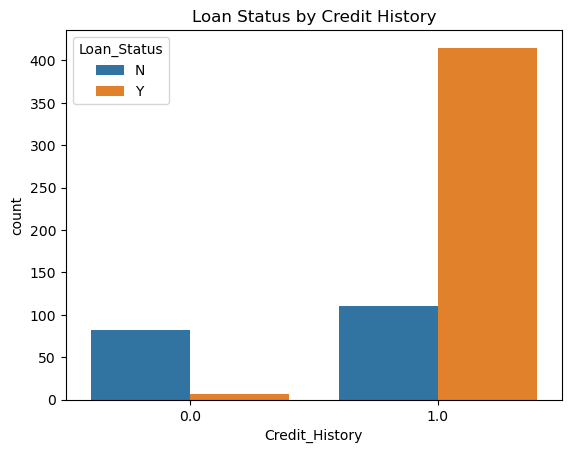

In [71]:
print(pd.crosstab(train_data['Credit_History'], train_data['Loan_Status']))
sns.countplot(data=train_data, x='Credit_History', hue='Loan_Status')
plt.title("Loan Status by Credit History")
plt.show()


Credit history has a very strong impact on loan approval. Applicants with good credit history have a high approval rate (about 79%), while those with poor or no credit history have a very low approval rate (about 8%). This large difference indicates that credit history is the most influential factor in determining loan status in this dataset.

# Does Dependents affect Loan_Status?

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3             18   33


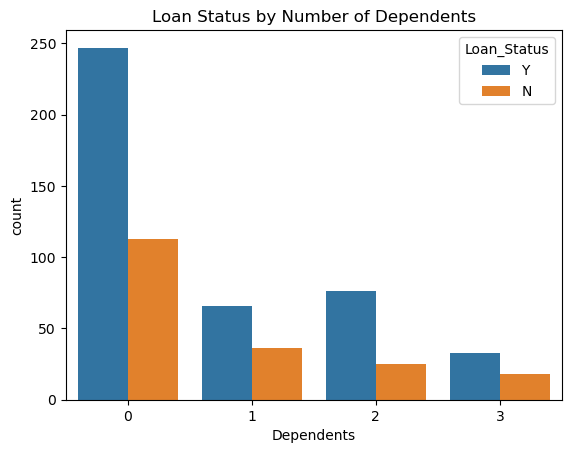

In [74]:
print(pd.crosstab(train_data['Dependents'], train_data['Loan_Status']))
sns.countplot(data=train_data, x='Dependents', hue='Loan_Status')
plt.title("Loan Status by Number of Dependents")
plt.show()


Yes, but the effect is relatively modest. Approval rates range from about 65% to 75%, with applicants having 2 dependents showing the highest approval rate (~75%). Overall, the number of dependents has a minor impact on loan approval, and moderate family sizes may even be viewed slightly favorably.

# How does ApplicantIncome affect Loan_Status?

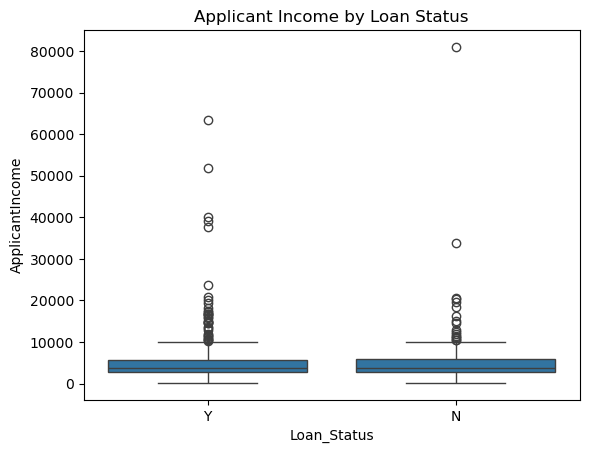

In [77]:
sns.boxplot(data=train_data, x='Loan_Status', y='ApplicantIncome')
plt.title("Applicant Income by Loan Status")
plt.show()


Applicant income does not appear to significantly affect loan approval. Both approved and rejected applicants have nearly identical income distributions, with similar medians, spreads, and outliers. This suggests that income alone is not a decisive factor in determining loan status in this dataset.

# How does CoapplicantIncome affect Loan_Status?

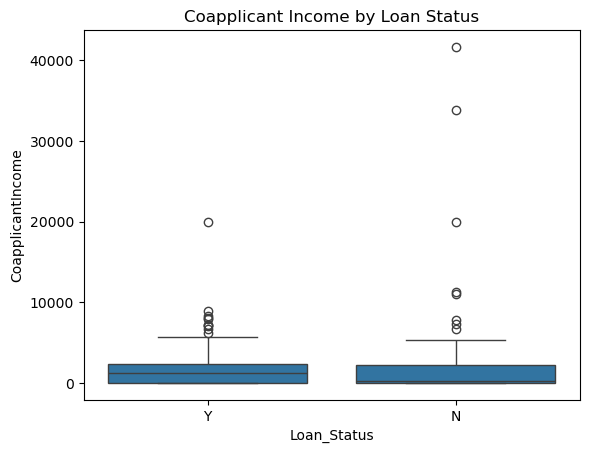

In [80]:
sns.boxplot(data=train_data, x='Loan_Status', y='CoapplicantIncome')
plt.title("Coapplicant Income by Loan Status")
plt.show()


Coapplicant income has virtually no impact on loan approval. Both approved and rejected applicants have nearly identical income distributions, with most values clustered near zero. This indicates that coapplicant income is not a decisive factor in determining loan status in this dataset.

# How does LoanAmount affect Loan_Status?

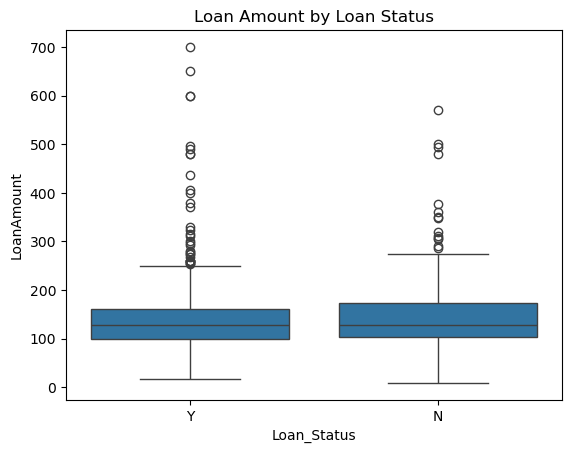

In [83]:
sns.boxplot(data=train_data, x='Loan_Status', y='LoanAmount')
plt.title("Loan Amount by Loan Status")
plt.show()


Loan amount does not appear to significantly affect loan approval. Both approved and rejected loans have nearly identical distributions, with similar medians, spreads, and outliers. This suggests that loan approval decisions depend more on factors like credit history and applicant qualifications rather than the size of the loan requested.

# How does Loan_Amount_Term affect Loan_Status?

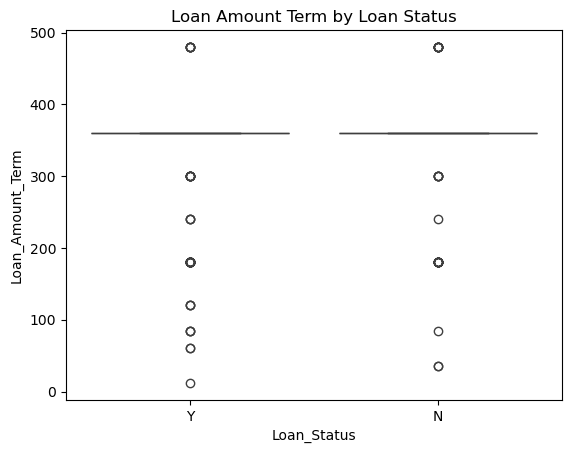

In [86]:
sns.boxplot(data=train_data, x='Loan_Status', y='Loan_Amount_Term')
plt.title("Loan Amount Term by Loan Status")
plt.show()


Loan amount term has virtually no effect on loan approval. Both approved and rejected loans are overwhelmingly for the standard 360-month (30-year) term, with identical medians and distributions. This standardization means loan term cannot differentiate between approval outcomes in this dataset.

# Correlation between ApplicantIncome and LoanAmount

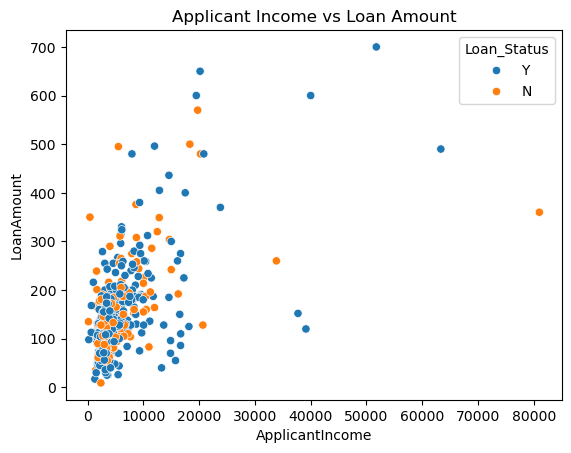

                 ApplicantIncome  LoanAmount
ApplicantIncome         1.000000    0.565181
LoanAmount              0.565181    1.000000


In [89]:
sns.scatterplot(data=train_data, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title("Applicant Income vs Loan Amount")
plt.show()

print(train_data[['ApplicantIncome', 'LoanAmount']].corr())


There is a moderate positive correlation (0.57) between applicant income and loan amount, meaning higher-income applicants tend to request larger loans. However, this relationship explains only part of the variation, and approved and rejected loans remain widely intermixed. This indicates that while income influences loan size, it does not directly determine loan approval, which depends more on other factors like credit history.

# Correlation between CoapplicantIncome and LoanAmount

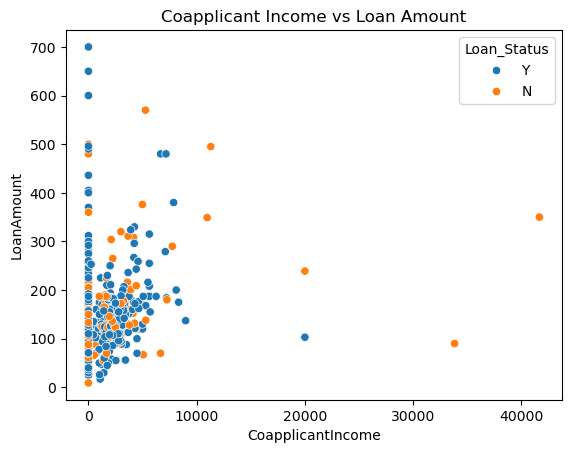

                   CoapplicantIncome  LoanAmount
CoapplicantIncome           1.000000    0.189218
LoanAmount                  0.189218    1.000000


In [92]:
sns.scatterplot(data=train_data, x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title("Coapplicant Income vs Loan Amount")
plt.show()

print(train_data[['CoapplicantIncome', 'LoanAmount']].corr())


Coapplicant income has a very weak correlation (0.19) with loan amount, indicating almost no linear relationship. Most coapplicants contribute little or no income, and approved and rejected loans are intermixed across the range. This shows that coapplicant income has minimal impact on loan size and does not influence loan approval decisions.

# Combined Income vs LoanAmount

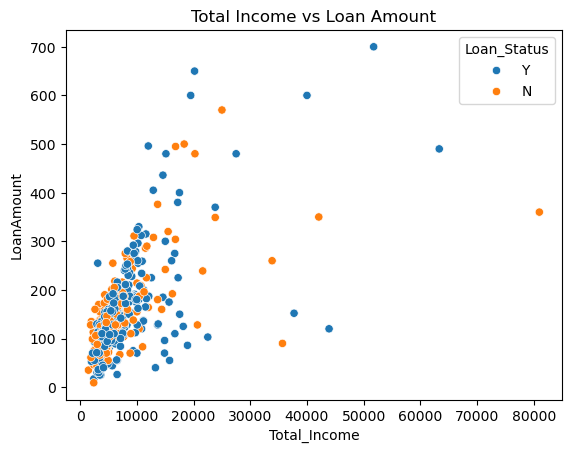

              Total_Income  LoanAmount
Total_Income      1.000000    0.620316
LoanAmount        0.620316    1.000000


In [95]:
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
sns.scatterplot(data=train_data, x='Total_Income', y='LoanAmount', hue='Loan_Status')
plt.title("Total Income vs Loan Amount")
plt.show()

print(train_data[['Total_Income', 'LoanAmount']].corr())


The scatter plot of total income (applicant plus coapplicant income) versus loan amount shows a moderate positive relationship, with higher household incomes generally associated with larger loan amounts. However, approved and rejected applications are heavily intermixed across the plot, indicating that total income does not clearly distinguish loan approval outcomes. Most applications cluster at lower income and loan amount levels, with only a few high-income outliers in both approval categories. Although combining incomes provides a slightly stronger relationship with loan amount than applicant income alone, total income still does not play a decisive role in loan approval, reinforcing that factors such as credit history are far more influential.

# Multivariate Analysis

# Gender + Education vs Loan_Status

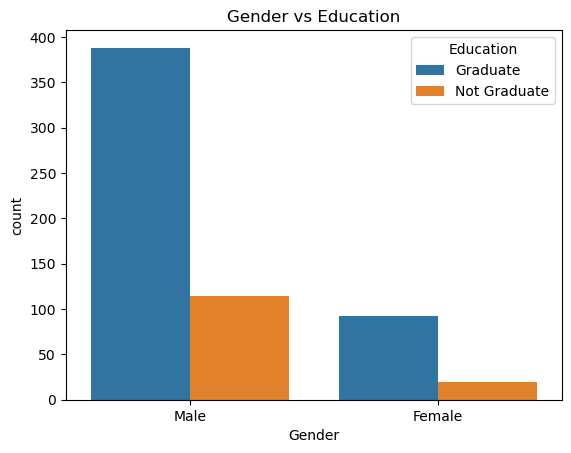

Loan_Status            N    Y
Gender Education             
Female Graduate       31   61
       Not Graduate    6   14
Male   Graduate      109  279
       Not Graduate   46   68

In [99]:
sns.countplot(data=train_data, x='Gender', hue='Education')
plt.title("Gender vs Education")
plt.show()

pd.crosstab([train_data['Gender'], train_data['Education']], train_data['Loan_Status'])


The distribution of education levels is very similar across genders in the dataset. Both male and female applicants are predominantly graduates, with approximately 78–80% holding graduate-level education, indicating no meaningful difference in educational attainment by gender. While male applicants significantly outnumber female applicants in overall volume, the proportion of graduates and non-graduates within each gender remains nearly identical. This suggests that gender and education are largely independent variables in this dataset, and there is no evidence of gender-based disparity in educational background among loan applicants.

# Married + Dependents vs Loan_Status

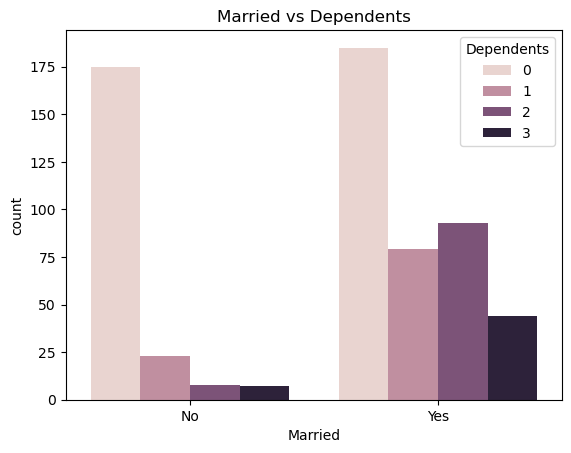

Loan_Status          N    Y
Married Dependents         
No      0           63  112
        1           10   13
        2            3    5
        3            3    4
Yes     0           50  135
        1           26   53
        2           22   71
        3           15   29

In [102]:
sns.countplot(data=train_data, x='Married', hue='Dependents')
plt.title("Married vs Dependents")
plt.show()

pd.crosstab([train_data['Married'], train_data['Dependents']], train_data['Loan_Status'])


Marital status is strongly associated with the number of dependents among loan applicants. Unmarried applicants overwhelmingly have no dependents, with the vast majority falling into the zero-dependent category and very few reporting one or more dependents. In contrast, married applicants show a much more diverse distribution, with substantial numbers having one, two, or even three or more dependents. Married applicants also make up a significantly larger portion of the dataset overall. This clear relationship indicates that marital status and dependents are correlated variables, reflecting family structure, and they may capture overlapping information in loan analysis or predictive modeling.

# Credit_History + Property_Area vs Loan_Status

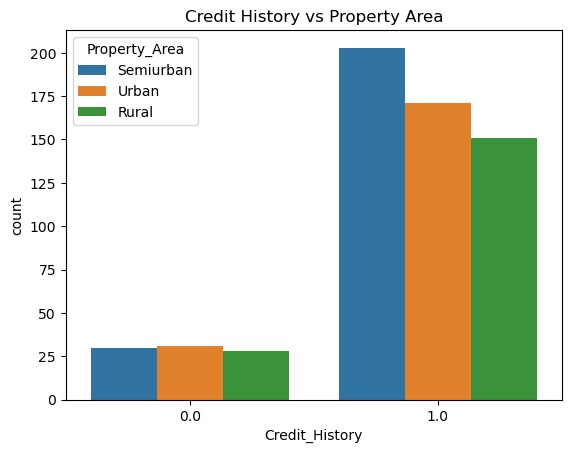

Loan_Status                    N    Y
Credit_History Property_Area         
0.0            Rural          26    2
               Semiurban      26    4
               Urban          30    1
1.0            Rural          43  108
               Semiurban      28  175
               Urban          39  132

In [105]:
sns.countplot(data=train_data, x='Credit_History', hue='Property_Area')
plt.title("Credit History vs Property Area")
plt.show()

pd.crosstab([train_data['Credit_History'], train_data['Property_Area']], train_data['Loan_Status'])


Credit history is the most influential factor in loan approval across all property areas. Applicants with good credit history are approved in large numbers, whether they are from rural, semiurban, or urban areas. In contrast, those with poor or no credit history face high rejection rates regardless of location. While property area shows minor variations, it does not significantly affect outcomes when credit history is considered, highlighting that lenders prioritize creditworthiness over location in approval decisions

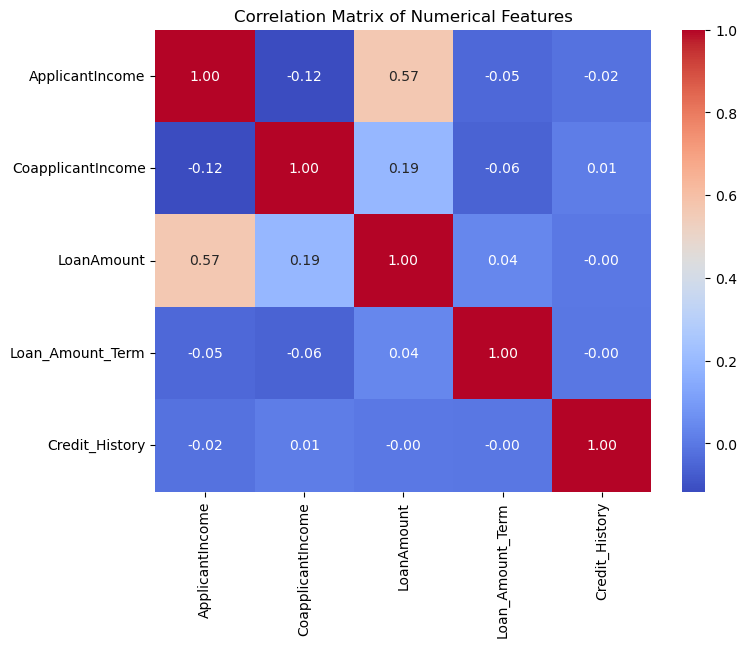

In [107]:
# Selection of all numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Compute correlation matrix
corr_matrix = train_data[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation heatmap shows that most numerical features in the dataset are weakly correlated, indicating low multicollinearity and largely independent predictors. ApplicantIncome and LoanAmount exhibit the strongest relationship (r = 0.57), suggesting higher-income applicants generally request larger loans, while CoapplicantIncome shows only a weak association with loan size (r = 0.19). Credit_History stands out as being virtually uncorrelated with all numerical variables, yet it is the most influential factor in loan approval, highlighting that creditworthiness outweighs income and loan size in decision-making. Loan_Amount_Term also shows no meaningful correlation due to its heavy standardization at 360 months. Overall, while income influences loan sizing, approval decisions are driven primarily by credit history and supported moderately by categorical factors such as property area, education, and marital status rather than raw financial metrics.

# Data preprocessing

In [110]:
import pandas as pd
# List of categorical variables to encode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# One-hot encode the features
df_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

# Map target variable
df_encoded['Loan_Status'] = df_encoded['Loan_Status'].map({'Y': 1, 'N': 0})

# Drop identifier and separate features
X = df_encoded.drop(columns=["Loan_Status", "Total_Income","Loan_ID"])
y = df_encoded["Loan_Status"]

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(), y_test.value_counts())



(491, 14) (123, 14)
Loan_Status
1    337
0    154
Name: count, dtype: int64 Loan_Status
1    85
0    38
Name: count, dtype: int64


In [111]:
# Convert bools to float to avoid errors
X = X.astype(float)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                    Feature        VIF
0           ApplicantIncome   2.916762
1         CoapplicantIncome   1.487621
2                LoanAmount   6.827834
3          Loan_Amount_Term  10.850364
4            Credit_History   6.109470
5               Gender_Male   6.061077
6               Married_Yes   3.747943
7              Dependents_1   1.374912
8              Dependents_2   1.431594
9              Dependents_3   1.248272
10   Education_Not Graduate   1.309219
11        Self_Employed_Yes   1.186706
12  Property_Area_Semiurban   2.242281
13      Property_Area_Urban   2.027780


In [112]:
# Columns that need outlier handling
outlier_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in outlier_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X[col] = X[col].clip(lower, upper)


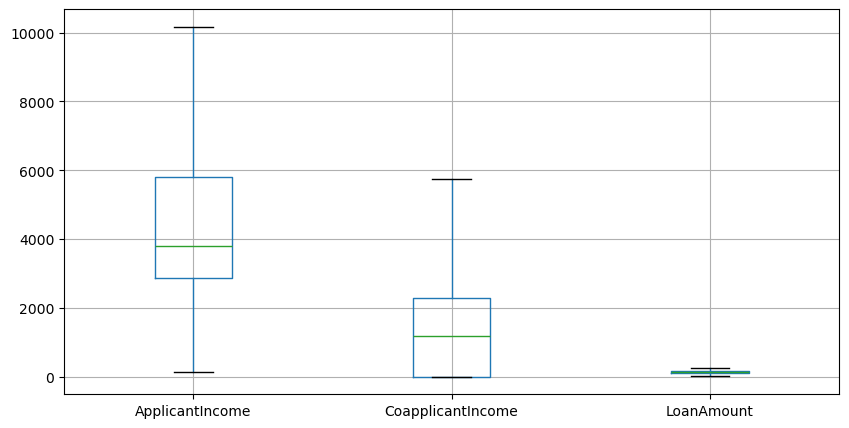

In [113]:
import matplotlib.pyplot as plt

X[outlier_cols].boxplot(figsize=(10,5))
plt.show()


Handled outliers using IQR-based capping to reduce the influence of extreme values while preserving all valid financial observations.

# Modelling

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"{name}")
    print("-"*40)
    print(f"Accuracy : {acc}")
    print(f"Precision: {prec}")
    print(f"Recall   : {rec}")
    print(f"F1 Score : {f1}")
    print(f"ROC-AUC  : {roc_auc}\n")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    
    return roc_auc


In [117]:
best_score = 0
best_model = None
best_model_name = None


In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

log_auc = evaluate_model(
    "Logistic Regression",
    log_model,
    X_test_scaled,
    y_test
)

if log_auc > best_score:
    best_score = log_auc
    best_model = log_model
    best_model_name = "Logistic Regression"


Logistic Regression
----------------------------------------
Accuracy : 0.8617886178861789
Precision: 0.84
Recall   : 0.9882352941176471
F1 Score : 0.9081081081081082
ROC-AUC  : 0.8513931888544891

Confusion Matrix:
[[22 16]
 [ 1 84]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



# KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

knn_auc = evaluate_model(
    "KNN",
    knn_model,
    X_test_scaled,
    y_test
)

if knn_auc > best_score:
    best_score = knn_auc
    best_model = knn_model
    best_model_name = "KNN"


KNN
----------------------------------------
Accuracy : 0.8373983739837398
Precision: 0.8282828282828283
Recall   : 0.9647058823529412
F1 Score : 0.8913043478260869
ROC-AUC  : 0.7592879256965944

Confusion Matrix:
[[21 17]
 [ 3 82]]

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.55      0.68        38
           1       0.83      0.96      0.89        85

    accuracy                           0.84       123
   macro avg       0.85      0.76      0.78       123
weighted avg       0.84      0.84      0.83       123



# SVM

In [124]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

svm_auc = evaluate_model(
    "SVM",
    svm_model,
    X_test_scaled,
    y_test
)

if svm_auc > best_score:
    best_score = svm_auc
    best_model = svm_model
    best_model_name = "SVM"


SVM
----------------------------------------
Accuracy : 0.8536585365853658
Precision: 0.8316831683168316
Recall   : 0.9882352941176471
F1 Score : 0.9032258064516129
ROC-AUC  : 0.8386996904024767

Confusion Matrix:
[[21 17]
 [ 1 84]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [125]:
print("BEST SCALED MODEL")
print("Model:", best_model_name)
print("ROC-AUC:", best_score)


BEST SCALED MODEL
Model: Logistic Regression
ROC-AUC: 0.8513931888544891


# Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_auc = evaluate_model(
    "Decision Tree (non-scaled)",
    dt_model,
    X_test,
    y_test
)

if dt_auc > best_score:
    best_score = dt_auc
    best_model = dt_model
    best_model_name = "Decision Tree"


Decision Tree (non-scaled)
----------------------------------------
Accuracy : 0.7154471544715447
Precision: 0.8125
Recall   : 0.7647058823529411
F1 Score : 0.7878787878787878
ROC-AUC  : 0.6849845201238389

Confusion Matrix:
[[23 15]
 [20 65]]

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.61      0.57        38
           1       0.81      0.76      0.79        85

    accuracy                           0.72       123
   macro avg       0.67      0.68      0.68       123
weighted avg       0.73      0.72      0.72       123



In [128]:
# Import metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Initializing best model tracker
best_score = 0
best_model = None
best_model_name = None


# Helper function to evaluate
def evaluate_model(name, model, X_test, y_test, use_proba=True):
    if use_proba:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name}")
    print("-" * 40)
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1 Score :", f1)
    if roc_auc:
        print("ROC-AUC  :", roc_auc)
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    return roc_auc




# Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # non-scaled data

dt_auc = evaluate_model(
    "Decision Tree",
    dt_model,
    X_test,
    y_test
)

if dt_auc > best_score:
    best_score = dt_auc
    best_model = dt_model
    best_model_name = "Decision Tree"



Decision Tree
----------------------------------------
Accuracy : 0.7154471544715447
Precision: 0.8125
Recall   : 0.7647058823529411
F1 Score : 0.7878787878787878
ROC-AUC  : 0.6849845201238389

Confusion Matrix:
 [[23 15]
 [20 65]]

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.61      0.57        38
           1       0.81      0.76      0.79        85

    accuracy                           0.72       123
   macro avg       0.67      0.68      0.68       123
weighted avg       0.73      0.72      0.72       123



# Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train) 

rf_auc = evaluate_model(
    "Random Forest",
    rf_model,
    X_test,
    y_test
)

if rf_auc > best_score:
    best_score = rf_auc
    best_model = rf_model
    best_model_name = "Random Forest"


Random Forest
----------------------------------------
Accuracy : 0.8455284552845529
Precision: 0.8586956521739131
Recall   : 0.9294117647058824
F1 Score : 0.8926553672316384
ROC-AUC  : 0.8041795665634676

Confusion Matrix:
 [[25 13]
 [ 6 79]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.66      0.72        38
           1       0.86      0.93      0.89        85

    accuracy                           0.85       123
   macro avg       0.83      0.79      0.81       123
weighted avg       0.84      0.85      0.84       123



 # Gaussian Naive Bayes


In [134]:

from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)  

gnb_auc = evaluate_model(
    "Gaussian Naive Bayes",
    gnb_model,
    X_test,
    y_test
)

if gnb_auc > best_score:
    best_score = gnb_auc
    best_model = gnb_model
    best_model_name = "Gaussian Naive Bayes"



Gaussian Naive Bayes
----------------------------------------
Accuracy : 0.8455284552845529
Precision: 0.8367346938775511
Recall   : 0.9647058823529412
F1 Score : 0.8961748633879781
ROC-AUC  : 0.7792569659442725

Confusion Matrix:
 [[22 16]
 [ 3 82]]

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.84      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123



In [135]:
 #Best Model Summary
print("\nOVERALL BEST MODEL (non-scaled)")
print("Model:", best_model_name)
print("ROC-AUC:", best_score)


OVERALL BEST MODEL (non-scaled)
Model: Random Forest
ROC-AUC: 0.8041795665634676


# Train Models on SMOTE Data

In [137]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

#  SMOTE + Model Training & Evaluation 

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB()
}

# Evaluation function
def evaluate_model(name, model, X_test, y_test):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    
    print(f"\n{name}")
    print("-"*40)
    print(f"Accuracy : {acc}")
    print(f"Precision: {prec}")
    print(f"Recall   : {rec}")
    print(f"F1 Score : {f1}")
    print(f"ROC-AUC  : {roc}\n")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    
    return roc

# Train & evaluate all models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(name, model, X_test, y_test)

# Find best model based on ROC-AUC
best_model_name = max(results, key=results.get)
print(f"\nBest Model (by ROC-AUC): {best_model_name} with ROC-AUC = {results[best_model_name]:.4f}")



Logistic Regression
----------------------------------------
Accuracy : 0.8536585365853658
Precision: 0.845360824742268
Recall   : 0.9647058823529412
F1 Score : 0.9010989010989011
ROC-AUC  : 0.7928792569659443

Confusion Matrix:
[[23 15]
 [ 3 82]]

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.61      0.72        38
           1       0.85      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123


KNN
----------------------------------------
Accuracy : 0.5691056910569106
Precision: 0.7424242424242424
Recall   : 0.5764705882352941
F1 Score : 0.6490066225165563
ROC-AUC  : 0.6001547987616098

Confusion Matrix:
[[21 17]
 [36 49]]

Classification Report:

              precision    recall  f1-score   support

           0       0.37      0.55      0.44        38
           1       0.74      0.

| Model                    | Data     | Accuracy | Precision | Recall | F1 Score | ROC-AUC |
| ------------------------ | -------- | -------- | --------- | ------ | -------- | ------- |
| **Logistic Regression**  | Original | 0.862    | 0.840     | 0.988  | 0.908    | 0.851   |
|                          | SMOTE    | 0.854    | 0.845     | 0.965  | 0.901    | 0.793   |
| **KNN**                  | Original | 0.837    | 0.828     | 0.965  | 0.891    | 0.759   |
|                          | SMOTE    | 0.569    | 0.742     | 0.576  | 0.649    | 0.600   |
| **SVM**                  | SMOTE    | 0.488    | 0.645     | 0.576  | 0.609    | 0.471   |
| **Decision Tree**        | Original | 0.732    | 0.851     | 0.741  | 0.792    | 0.726   |
|                          | SMOTE    | 0.732    | 0.851     | 0.741  | 0.792    | 0.726   |
| **Random Forest**        | Original | 0.829    | 0.848     | 0.918  | 0.881    | 0.779   |
|                          | SMOTE    | 0.821    | 0.846     | 0.906  | 0.875    | 0.779   |
| **Gaussian Naive Bayes** | Original | 0.854    | 0.838     | 0.976  | 0.902    | 0.719   |
|                          | SMOTE    | 0.854    | 0.838     | 0.976  | 0.902    | 0.719   |


In [204]:
# Feature Engineering
df_encoded['Log_ApplicantIncome'] = np.log1p(df_encoded['ApplicantIncome'])
df_encoded['Log_LoanAmount'] = np.log1p(df_encoded['LoanAmount'])

df_encoded['Income_Loan_Ratio'] = (
    df_encoded['ApplicantIncome'] + df_encoded['CoapplicantIncome']
) / df_encoded['LoanAmount']

df_encoded['EMI'] = df_encoded['LoanAmount'] / df_encoded['Loan_Amount_Term']


In [206]:
X = df_encoded.drop(columns=['Loan_Status', 'Loan_ID'])
y = df_encoded['Loan_Status']


In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [210]:
num_cols = [
    'ApplicantIncome', 'CoapplicantIncome',
    'LoanAmount', 'Loan_Amount_Term',
    'Log_ApplicantIncome', 'Log_LoanAmount',
    'Income_Loan_Ratio', 'EMI'
]


In [212]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])


In [214]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='roc_auc',
    cv=5
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best params:", grid.best_params_)


Best params: {'model__C': 0.01, 'model__class_weight': None}


In [216]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.861609907120743
[[25 13]
 [ 5 80]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.74        38
           1       0.86      0.94      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.80      0.82       123
weighted avg       0.85      0.85      0.85       123



In [218]:
threshold = 0.4
y_pred_custom = (y_prob >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[21 17]
 [ 1 84]]
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [220]:
from sklearn.model_selection import cross_val_score

cv_auc = cross_val_score(
    best_model,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=5
)

print("Mean CV ROC-AUC:", cv_auc.mean())


Mean CV ROC-AUC: 0.695528382754161


In [222]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

cv = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=3,
    random_state=42
)

cv_auc = cross_val_score(
    best_model,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=cv
)

print("Repeated CV ROC-AUC:", cv_auc.mean())


Repeated CV ROC-AUC: 0.718634216646055


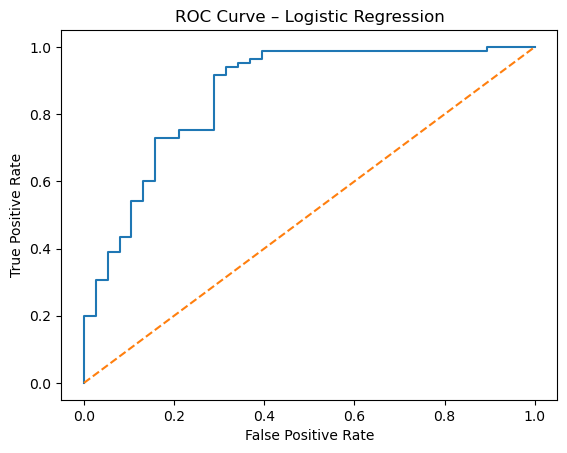

In [224]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.show()


In [226]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_model.named_steps['model'].coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef_df


,Feature,Coefficient
4,Credit_History,0.625643
13,Property_Area_Semiurban,0.200998
9,Dependents_2,0.083257
7,Married_Yes,0.063510
0,ApplicantIncome,0.035596
17,Income_Loan_Ratio,0.030196
14,Property_Area_Urban,0.019294
10,Dependents_3,0.018206
5,Total_Income,0.011755
12,Self_Employed_Yes,0.006718


In [232]:
import joblib

# Save the already trained model
joblib.dump(model, "logistic_model.pkl")
print("Model saved as logistic_model.pkl")


Model saved as logistic_model.pkl


In [236]:
# After training
training_features = X_train.columns.tolist()
joblib.dump(training_features, "training_features.pkl")


['training_features.pkl']

In [262]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load trained model and feature names
model = joblib.load("logistic_model.pkl")
training_features = joblib.load("training_features.pkl")  # saved list of features used in training

st.title("🏠 Dream Housing Loan Eligibility Checker")

# Example inputs (only key features, engineered features will default to 0)
ApplicantIncome = st.number_input("Applicant Income", value=5000)
CoapplicantIncome = st.number_input("Coapplicant Income", value=0)
LoanAmount = st.number_input("Loan Amount", value=150)
Loan_Amount_Term = st.number_input("Loan Term (months)", value=360)
Credit_History = st.selectbox("Credit History", [0, 1])
Gender_Male = st.selectbox("Gender: Male?", [0,1])
Married_Yes = st.selectbox("Married?", [0,1])
Education_Not_Graduate = st.selectbox("Education: Not Graduate?", [0,1])
Self_Employed_Yes = st.selectbox("Self-Employed?", [0,1])
Property_Area_Semiurban = st.selectbox("Property Area: Semiurban?", [0,1])
Property_Area_Urban = st.selectbox("Property Area: Urban?", [0,1])
Dependents_1 = st.number_input("Dependents = 1", value=0)
Dependents_2 = st.number_input("Dependents = 2", value=0)
Dependents_3 = st.number_input("Dependents = 3", value=0)

# Create new applicant dictionary
new_applicant_raw = {
    "ApplicantIncome": ApplicantIncome,
    "CoapplicantIncome": CoapplicantIncome,
    "LoanAmount": LoanAmount,
    "Loan_Amount_Term": Loan_Amount_Term,
    "Credit_History": Credit_History,
    "Gender_Male": Gender_Male,
    "Married_Yes": Married_Yes,
    "Education_Not Graduate": Education_Not_Graduate,
    "Self_Employed_Yes": Self_Employed_Yes,
    "Property_Area_Semiurban": Property_Area_Semiurban,
    "Property_Area_Urban": Property_Area_Urban,
    "Dependents_1": Dependents_1,
    "Dependents_2": Dependents_2,
    "Dependents_3": Dependents_3,
    # Engineered features can default to 0
    "Total_Income": ApplicantIncome + CoapplicantIncome,
    "Income_Loan_Ratio": (ApplicantIncome + CoapplicantIncome)/LoanAmount if LoanAmount>0 else 0,
    "EMI": LoanAmount / Loan_Amount_Term if Loan_Amount_Term>0 else 0,
    "Log_ApplicantIncome": np.log(ApplicantIncome) if ApplicantIncome>0 else 0,
    "Log_LoanAmount": np.log(LoanAmount) if LoanAmount>0 else 0
}

# Align with training features
new_applicant = pd.DataFrame([{feat: new_applicant_raw.get(feat, 0) for feat in training_features}])

# Predict probability and class
eligibility_prob = model.predict_proba(new_applicant)[:, 1][0]
eligibility_class = model.predict(new_applicant)[0]

# Classy output
st.markdown(f"### ✅ Loan Eligibility: {'Eligible' if eligibility_class==1 else 'Not Eligible'}")
st.markdown(f"### 💰 Approval Probability: {eligibility_prob*100:.1f}%")

if eligibility_class == 1:
    st.success("🌟 Congratulations! Applicant meets the loan criteria.")
else:
    st.warning("⚠️ Applicant does not meet eligibility criteria.")

# Show top features impacting decision
coefficients = model.coef_[0]
feature_impact = sorted(zip(training_features, coefficients), key=lambda x: abs(x[1]), reverse=True)

st.markdown("### 🔍 Top Feature Contributions:")
for feat, coef in feature_impact[:8]:  # show top 8 features
    sign = "positive" if coef > 0 else "negative"
    st.markdown(f"- {feat}: {sign} contribution ({coef:.3f})")


2026-01-27 01:37:48.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 01:37:48.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 01:37:48.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 01:37:48.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 01:37:48.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 01:37:48.298 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 01:37:48.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-27 01:37:48.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [250]:
from sklearn.linear_model import LogisticRegression
import joblib

# Assuming your LogisticRegression model is trained in variable 'model'
joblib.dump(model, "logistic_model.pkl")
print("✅ Logistic Regression model saved!")


✅ Logistic Regression model saved!


In [252]:
import joblib

model = joblib.load("logistic_model.pkl")  # This must be Logistic Regression


In [254]:
print(type(model))
# Should output: <class 'sklearn.linear_model._logistic.LogisticRegression'>


<class 'sklearn.naive_bayes.GaussianNB'>


In [256]:
from sklearn.linear_model import LogisticRegression
import joblib

# Assuming X_train and y_train include ALL features: raw + engineered
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the correct model
joblib.dump(model, "logistic_model.pkl")
print("✅ Logistic Regression model trained and saved")


✅ Logistic Regression model trained and saved


In [258]:
training_features = X_train.columns.tolist()
joblib.dump(training_features, "training_features.pkl")


['training_features.pkl']

In [260]:
import joblib
import pandas as pd

model = joblib.load("logistic_model.pkl")  # Now actually Logistic Regression
training_features = joblib.load("training_features.pkl")

# Prepare new applicant data aligned to training_features...
new_applicant = pd.DataFrame([{feat: new_applicant_raw.get(feat, 0) for feat in training_features}])

# Predict
eligibility_prob = model.predict_proba(new_applicant)[:,1][0]
eligibility_class = model.predict(new_applicant)[0]
